In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

# The Data
[Read about the data here](https://www.kaggle.com/lava18/google-play-store-apps)

In [112]:
google_play_df = pd.read_csv("data/googleplaystore.csv")
google_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [113]:
google_play_reviews_df = pd.read_csv("data/googleplaystore_user_reviews.csv")
display(google_play_reviews_df.head())
google_play_reviews_df.isna().sum()
google_play_reviews_df.info()

slimmed_reviews = google_play_reviews_df.dropna()
slimmed_reviews.info()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity    37427 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [114]:
display(google_play_df.info())
google_play_df['Category'].unique()
#google_play_df.isna().sum()
#for col in google_play_df.columns:
    #print(col, '\n', google_play_df[col].value_counts(normalize=True).head(), '\n\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


None

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [115]:
#google_play_df['Reviews'] = pd.to_numeric(google_play_df['Reviews'])
google_play_df['Reviews'] = google_play_df['Reviews'].map(lambda x: x.replace('M', '00000').replace('.', "") )
google_play_df['Reviews'] = pd.to_numeric(google_play_df['Reviews'])


In [80]:
google_play_df.info()
google_play_df.isna().sum()
#google_play_df['Size'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null int64
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [116]:
google_play_df['Installs'].value_counts()
#google_play_df['Installs'] = google_play_df['Installs'].map(lambda x: x.replace('+', ''),replace(',', ''))
#google_play_df['Installs'] = pd.to_numeric(google_play_df['Installs'])

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [117]:
google_play_df = google_play_df[google_play_df['Category'] != '1.9']
google_play_df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

# Question 1: 
Which category, in your opinion, has the best ratings? How are you measuring best ratings?


Use the `googleplaystore.csv`

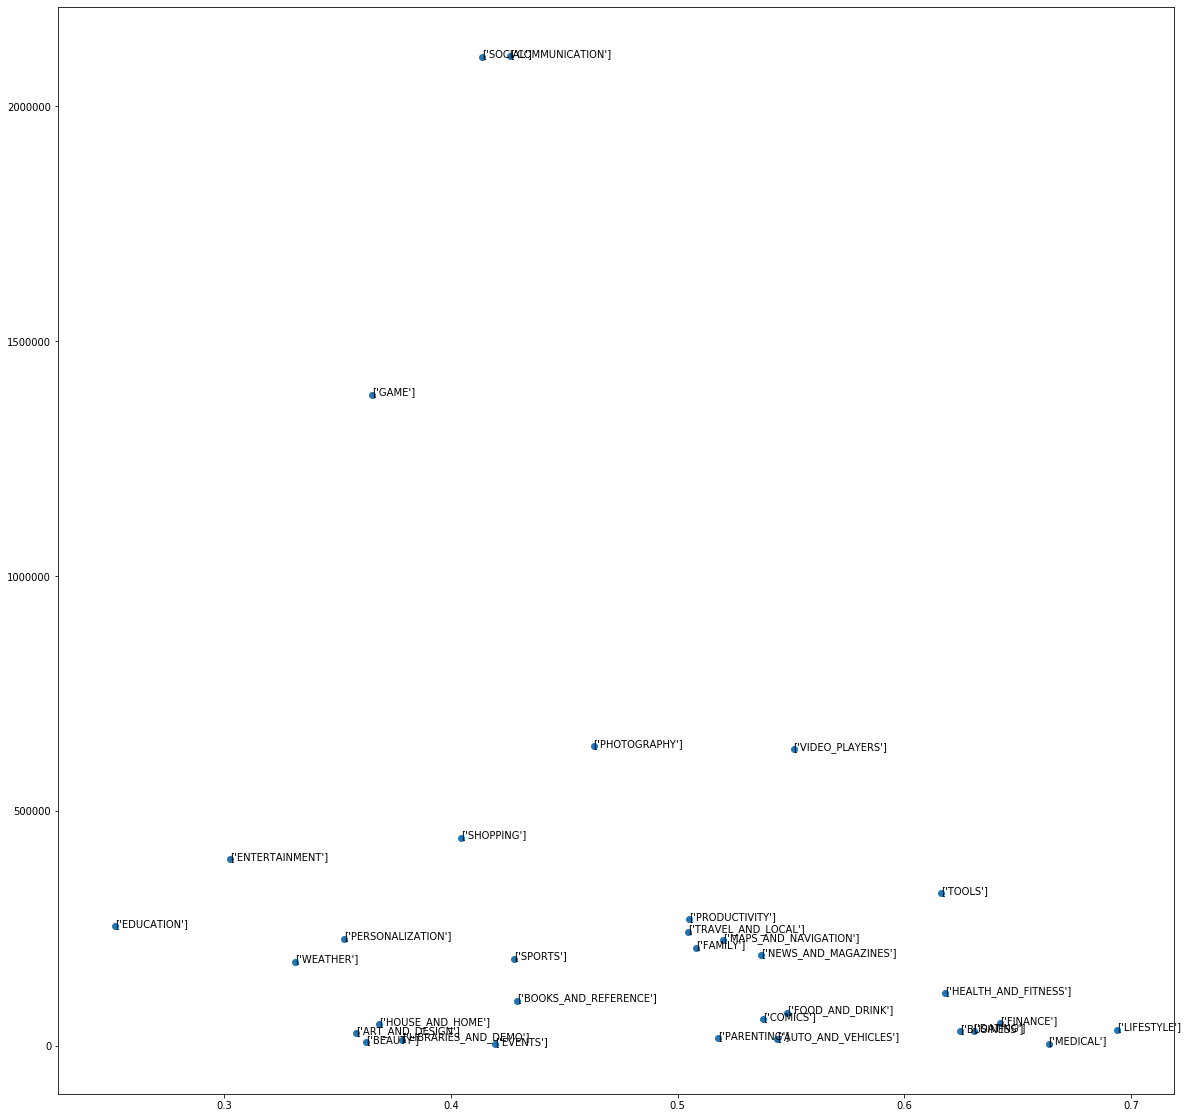

In [215]:
x = google_play_df.groupby('Category')['Rating'].std()
y = google_play_df.groupby('Category')['Reviews'].mean()
labs = google_play_df.groupby('Category')['Category'].unique()

fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(x, y)

for i, cat in enumerate(labs):
    ax.annotate(cat, (x[i], y[i]))
    
#print(x, y)
plt.show()

In [174]:
google_play_df.groupby('Category').head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_units,size_amount,size_bytes
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M,19.0,19000000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M,14.0,14000000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,M,8.7,8700000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,M,25.0,25000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,M,2.8,2800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3820,"Waze - GPS, Maps, Traffic Alerts & Live Naviga...",MAPS_AND_NAVIGATION,4.6,7232629,Varies with device,"100,000,000+",Free,0,Everyone,Maps & Navigation,"July 29, 2018",Varies with device,Varies with device,None,NaN,NaN
3821,"T map (te map, T map, navigation)",MAPS_AND_NAVIGATION,4.2,15681,Varies with device,"5,000,000+",Free,0,Everyone,Maps & Navigation,"August 2, 2018",Varies with device,Varies with device,None,NaN,NaN
3822,"MapQuest: Directions, Maps, GPS & Navigation",MAPS_AND_NAVIGATION,4.1,53481,Varies with device,"10,000,000+",Free,0,Everyone,Maps & Navigation,"May 22, 2018",Varies with device,Varies with device,None,NaN,NaN
3823,"Yahoo! transit guide free timetable, operation...",MAPS_AND_NAVIGATION,4.4,104800,22M,"10,000,000+",Free,0,Everyone,Maps & Navigation,"July 26, 2018",7.0.1,4.0 and up,M,22.0,22000000.0


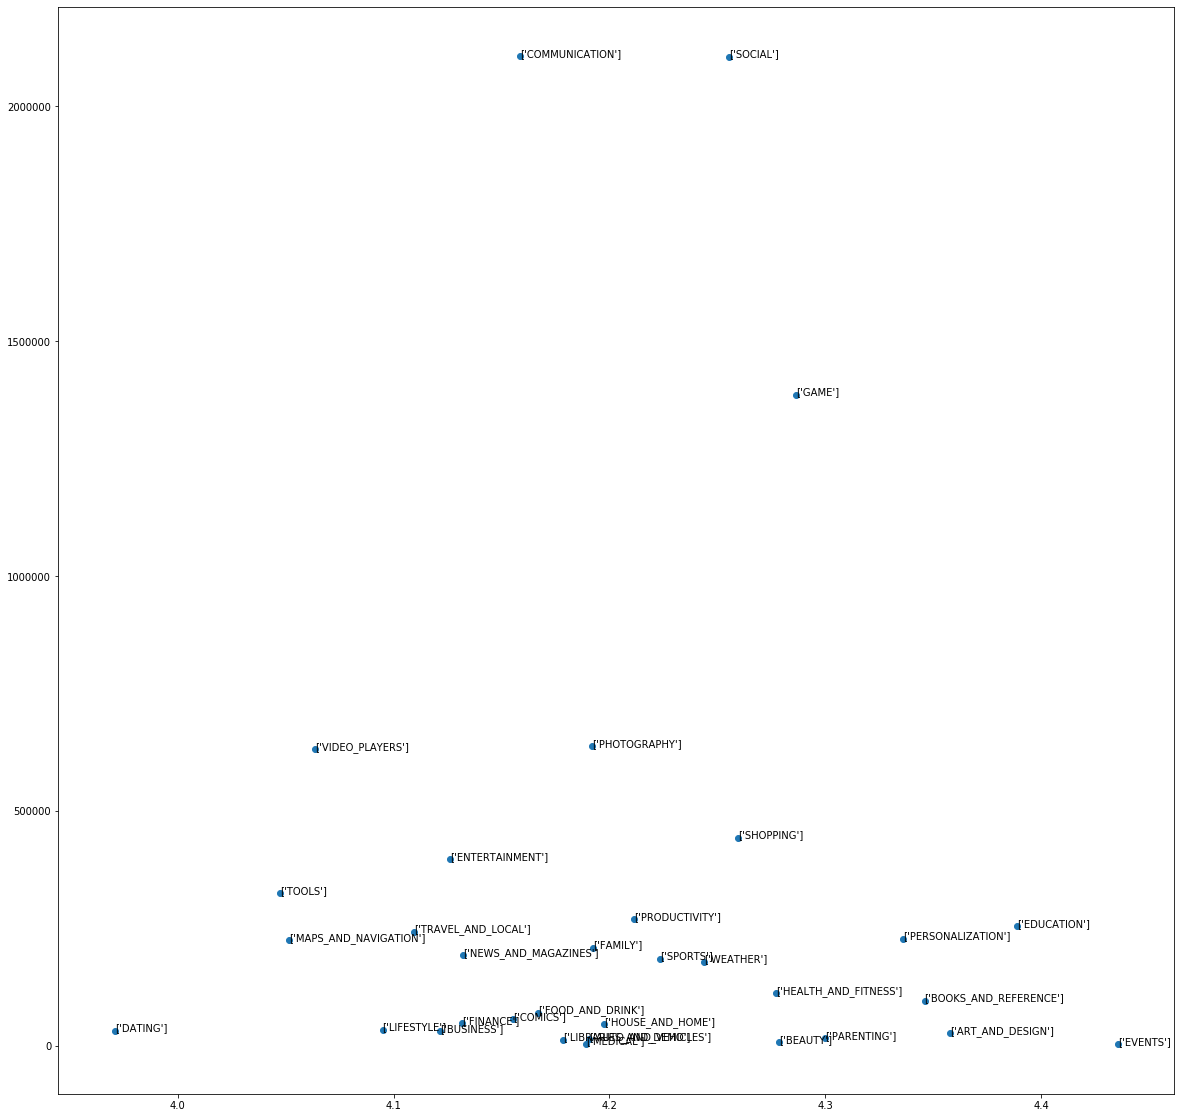

In [177]:
x = google_play_df.groupby('Category')['Rating'].mean()
y = google_play_df.groupby('Category')['Reviews'].mean()
labs = google_play_df.groupby('Category')['Category'].unique()

fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(x, y)

for i, cat in enumerate(labs):
    ax.annotate(cat, (x[i], y[i]))
    
#print(x, y)
plt.show()

# Question 2:
Is there a relationship between ratings and size? How did you measure the relationship? Why did you choose this measurement? 

Please create a scatterplot of size vs ratings to demonstrate the relationship or lack thereof. 

In [136]:
google_play_df['Size'].value_counts(normalize = True)['Varies with device']
cleansize_df = google_play_df[google_play_df['Size'] != 'Varies with device']

In [ ]:
# cleansize_df['Size'] = fix(cleansize_df['Size'])

In [146]:
google_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [152]:
google_play_df['Size'].apply(lambda s: s[-1])

0        M
1        M
2        M
3        M
4        M
        ..
10836    M
10837    M
10838    M
10839    e
10840    M
Name: Size, Length: 10840, dtype: object

In [158]:
google_play_df['size_units'] = google_play_df["Size"].apply(lambda x: x[-1] if (x.endswith("M") or x.endswith("k")) else None)
google_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_units
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,M
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,M
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,M


In [159]:
def convert_size(s):
    s = s.replace("M", "")
    s = s.replace("k", "")
    try:
        return float(s)
    except:
        return None

In [160]:
google_play_df['size_amount'] = google_play_df["Size"].apply(convert_size)
google_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_units,size_amount
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,M,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,M,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,M,2.8


In [171]:
sizes = []
for index, row in google_play_df.iterrows():
    if row['size_units']=="M":
        byte_size = row['size_amount']*1000000
    elif row['size_units']=="k":
        byte_size = row['size_amount']*1000
    else:
        byte_size = None
    sizes.append(byte_size)
google_play_df['size_bytes'] = sizes
google_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_units,size_amount,size_bytes
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M,19.0,19000000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M,14.0,14000000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,M,8.7,8700000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,M,25.0,25000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,M,2.8,2800000.0


In [162]:
mean_size = google_play_df.size_amount.mean()
mean_size

37.03544013121925

In [191]:
google_play_df['size_units'].value_counts(normalize=True)
mega = google_play_df[google_play_df['size_units'] == 'M']
mega.describe()

,Rating,Reviews,size_amount,size_bytes
count,7471.000000,8.829000e+03,8829.000000,8.829000e+03
mean,4.179762,2.577767e+05,22.270540,2.227054e+07
std,0.544246,1.746021e+06,22.628691,2.262869e+07
min,1.000000,0.000000e+00,1.000000,1.000000e+06
25%,4.000000,2.200000e+01,5.400000,5.400000e+06
50%,4.300000,8.520000e+02,14.000000,1.400000e+07
75%,4.500000,2.743900e+04,31.000000,3.100000e+07
max,5.000000,4.489389e+07,100.000000,1.000000e+08


In [192]:
kilo = google_play_df[google_play_df['size_units'] == 'k']
kilo.describe()

,Rating,Reviews,size_amount,size_bytes
count,258.000000,316.000000,316.000000,3.160000e+02
mean,4.002713,5189.585443,449.564873,4.495649e+05
std,0.526600,20195.371028,304.306187,3.043062e+05
min,1.800000,0.000000,8.500000,8.500000e+03
25%,3.800000,15.000000,192.000000,1.920000e+05
50%,4.100000,76.000000,411.500000,4.115000e+05
75%,4.400000,685.500000,714.500000,7.145000e+05
max,5.000000,172990.000000,1020.000000,1.020000e+06


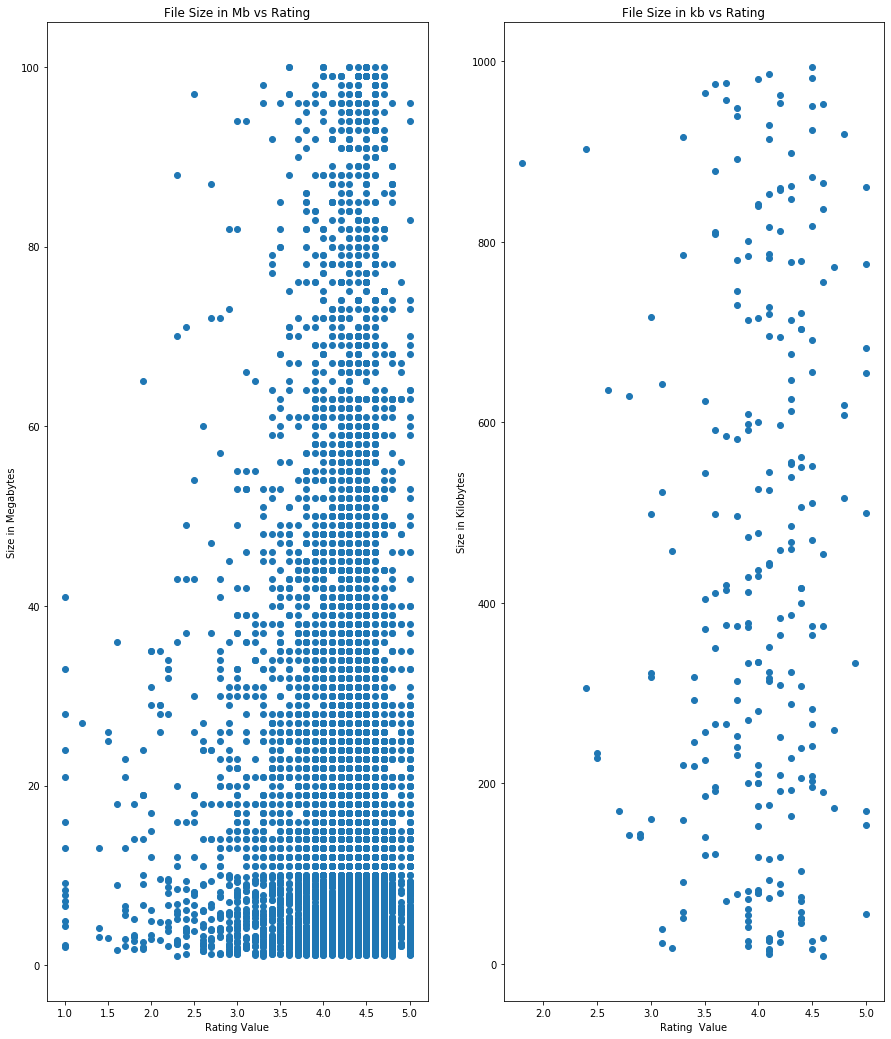

In [209]:
new_fig = plt.figure(figsize = (15,18))
axx = mega['Rating']
axy = mega['size_amount']
ax = new_fig.add_subplot(121)
ax.set_xlabel('Rating Value')
ax.set_ylabel('Size in Megabytes')
ax.set_title('File Size in Mb vs Rating')
ax.scatter(axx,axy)

ax2 = new_fig.add_subplot(122)
axx2 = kilo['Rating']
axy2 = kilo['size_amount']
ax2.set_xlabel('Rating  Value')
ax2.set_ylabel('Size in Kilobytes')
ax2.set_title('File Size in kb vs Rating')
ax2.scatter(axx2,axy2)

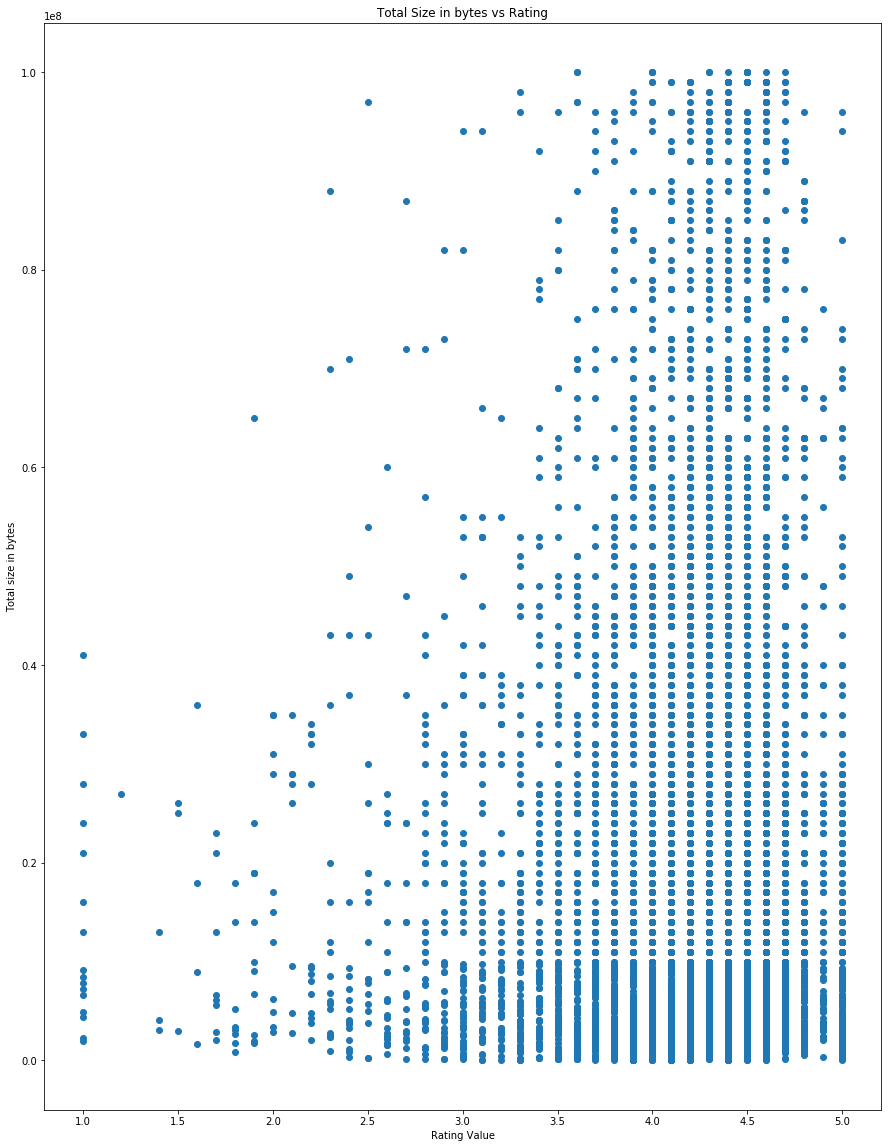

In [214]:
x=google_play_df['Rating']
y=google_play_df['size_bytes']
ax = plt.figure(figsize=(15,20))
ax3 = ax.add_subplot(111)
ax3.set_title('Total Size in bytes vs Rating')
ax3.set_xlabel('Rating Value')
ax3.set_ylabel('Total size in bytes')
ax3.scatter(x,y)


# For this next section, choose a Category of playstore apps

## Category Chosen: [insert here]



# Question 3:
For your category, how many genres are represented? What are their counts? Please show this with a bar chart. 

# Question 4:
What is something interesting you found about your category? 

# Question 5:
What is something interesting you found about your category in relationship to the rest of the data? 

# Question 6:
Anything else we should know about this dataset?